In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
print('Seaborn version',sns.__version__)
#sns.set_style('whitegrid')

import string
import re
df=pd.read_csv('bestsellers with categories.csv')

Seaborn version 0.13.0


In [18]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [19]:
df.rename(columns={'User Rating':'User_Rating'},inplace=True)
df[df.Author=='J. K. Rowling']
df[df.Author=='J.K. Rowling']
df.loc[df.Author=='J. K. Rowling','Author']='J.K. Rowling'
df['name_len']=df['Name'].apply(lambda x: len(x)-x.count(" "))
punctuations=string.punctuation
print('list of punctuations : ',punctuations)

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
def count_punc(text):
    '''This function counts the number of punctuations in a Text'''
    count=sum(1 for char in text if char in punctuations)
    print(text,count)
    return round(count/(len(text)-text.count(" "))*100,3)

In [21]:
df['punc%']=df['Name'].apply(lambda x:count_punc(x))

10-Day Green Smoothie Cleanse 1
11/22/63: A Novel 3
12 Rules for Life: An Antidote to Chaos 1
1984 (Signet Classics) 2
5,000 Awesome Facts (About Everything!) (National Geographic Kids) 6
A Dance with Dragons (A Song of Ice and Fire) 2
A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons 4
A Gentleman in Moscow: A Novel 1
A Higher Loyalty: Truth, Lies, and Leadership 3
A Man Called Ove: A Novel 1
A Man Called Ove: A Novel 1
A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror 3
A Stolen Life: A Memoir 1
A Wrinkle in Time (Time Quintet) 2
Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment 5
Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns 5
Adult Coloring Book: Stress Relieving Animal Designs 1
Adult Coloring Book: Stress Relieving Patterns 1
Adult Coloring Books: A Coloring Book

In [22]:
df

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169
...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36,5.556
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,71,1.408
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,71,1.408
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,71,1.408


C:\Users\thaku\AppData\Local\Temp\ipykernel_1948\2126310338.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


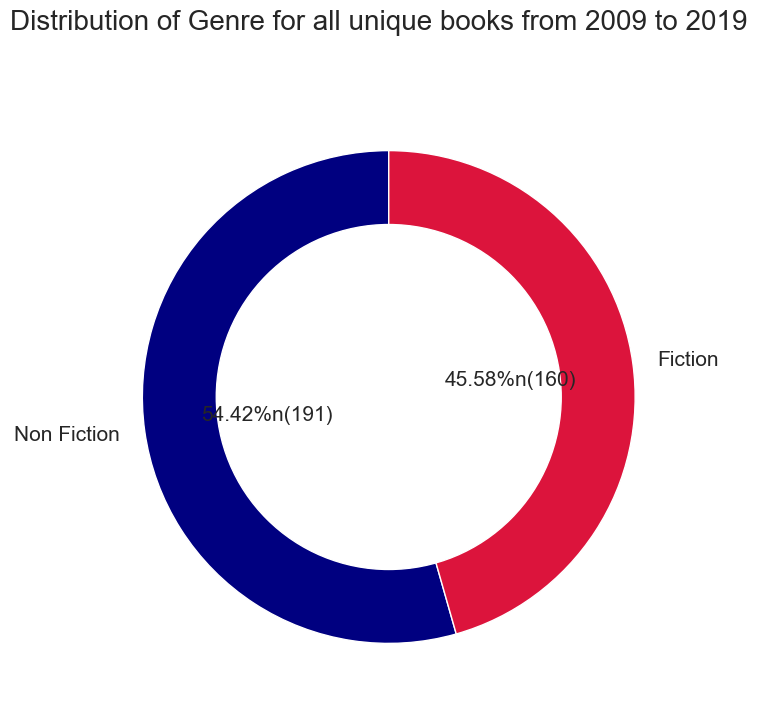

In [23]:
no_dup=df.drop_duplicates('Name')
g_count=no_dup['Genre'].value_counts()
fig,ax=plt.subplots(figsize=(8,8))

def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        val=int(round(pct*total/100.0))
        return '{p:.2f}%n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col=['navy','crimson']

center_circle=plt.Circle((0,0),.7,color='white')
plt.pie(x=g_count.values,labels=g_count.index,autopct=make_autopct(g_count.values),
       startangle=90,textprops={'size':15},pctdistance=.5,colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019',fontsize=20)
fig.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_1948\4125045490.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


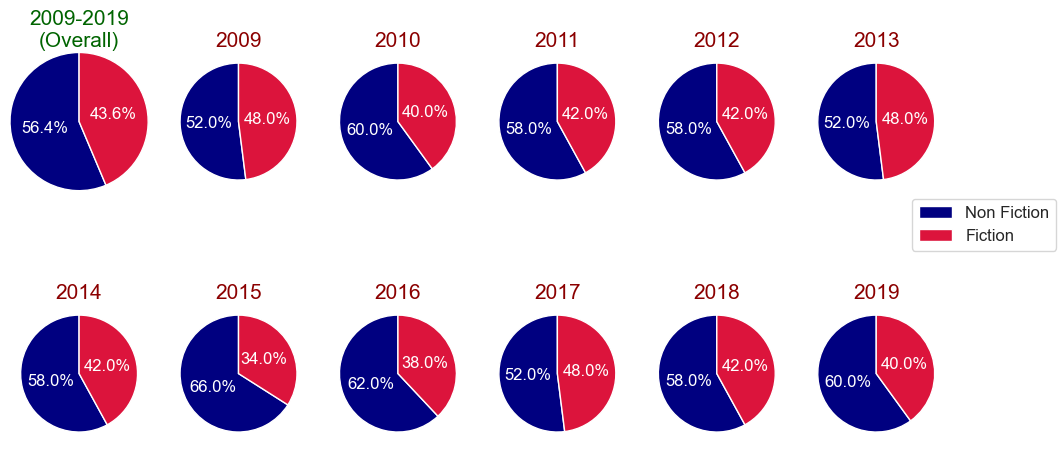

In [25]:
y1=np.arange(2009,2014)
y2=np.arange(2014,2020)
g_count=df['Genre'].value_counts()

fig,ax=plt.subplots(2,6,figsize=(12,6))

ax[0,0].pie(x=g_count.values,labels=None,autopct='%1.1f%%',startangle=90,textprops={'size':12,'color':'white'},pctdistance=.5,radius=1.3,colors=genre_col)
ax[0,0].set_title('2009-2019\n(Overall)',color='darkgreen',fontdict={'fontsize':15})

for i,year in enumerate(y1):
    counts=df[df['Year']==year]['Genre'].value_counts()
    ax[0,i+1].set_title(year,color='darkred',fontdict={'fontsize':15})
    ax[0,i+1].pie(x=counts.values,labels=None,autopct='%1.1f%%',startangle=90,textprops={'size':12,'color':'white'},pctdistance=.5,colors=genre_col,radius=1.1)
    
for i,year in enumerate(y2):
    counts=df[df['Year']==year]['Genre'].value_counts()
    ax[1,i].set_title(year,color='darkred',fontdict={'fontsize':15})
    ax[1,i].pie(x=counts.values,labels=None,autopct='%1.1f%%',startangle=90,textprops={'size':12,'color':'white'},pctdistance=.5,colors=genre_col,radius=1.1)

fig.legend(g_count.index,loc='center right',fontsize=12)
fig.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_1948\587478706.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(best_nf_authors.index,fontsize=12,fontweight='semibold')
C:\Users\thaku\AppData\Local\Temp\ipykernel_1948\587478706.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(best_f_authors.index,fontsize=12,fontweight='semibold')


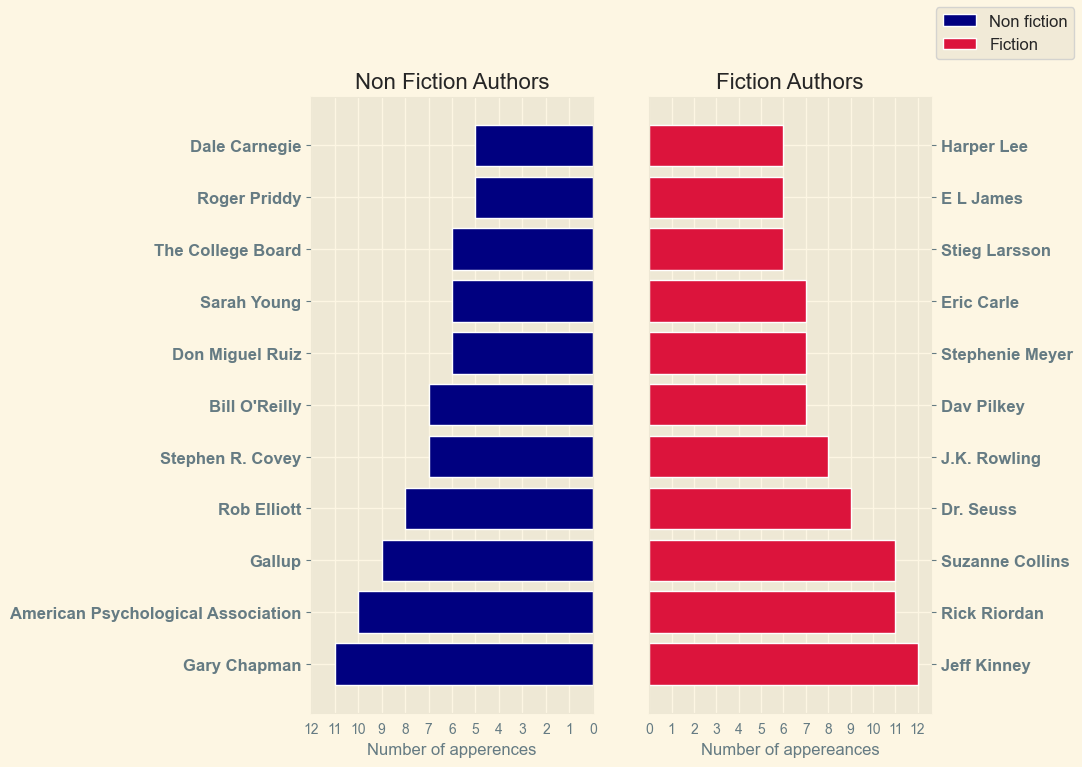

In [32]:
best_nf_authors=df.groupby(['Author','Genre']).agg({'Name':'count'}).unstack()['Name','Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors=df.groupby(['Author','Genre']).agg({'Name':'count'}).unstack()['Name','Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig,ax=plt.subplots(1,2,figsize=(8,8))
    ax[0].barh(y=best_nf_authors.index,width=best_nf_authors.values,color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index,fontsize=12,fontweight='semibold')
    ax[0].set_xlabel('Number of apperences')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index,width=best_f_authors.values,color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index,fontsize=12,fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appereances')
    
    fig.legend(['Non fiction','Fiction'],fontsize=12)
    
plt.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_1948\3763171994.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(top_authors.index,fontweight="semibold")


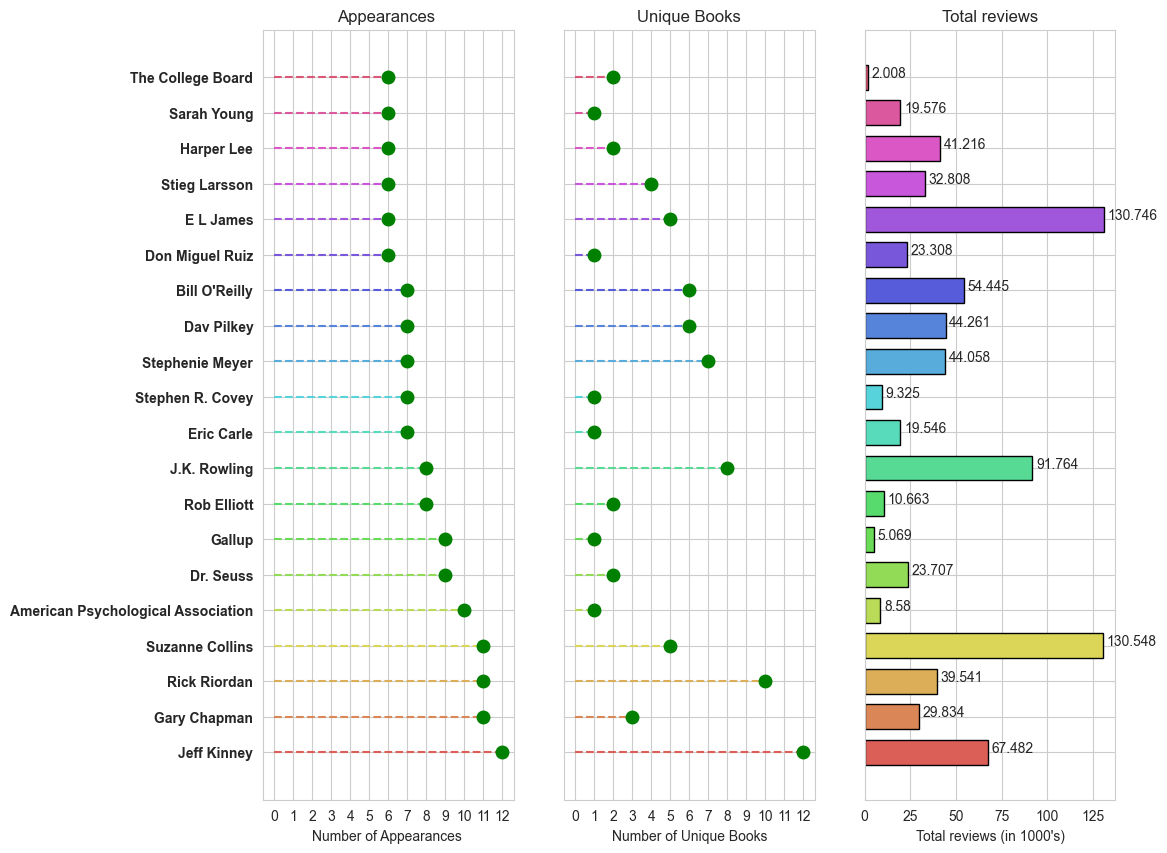

In [38]:
n_best=20

top_authors=df.Author.value_counts().nlargest(n_best)
no_dup=df.drop_duplicates('Name')

fig,ax=plt.subplots(1,3,figsize=(11,10),sharey=True)
color=sns.color_palette('hls',n_best)

ax[0].hlines(y=top_authors.index,xmin=0,xmax=top_authors.values,color=color,linestyles='dashed')
ax[0].plot(top_authors.values,top_authors.index,'go',markersize=9)
ax[0].set_xlabel('Number of Appearances ')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index,fontweight="semibold")
ax[0].set_title('Appearances ')

book_count=[]
total_reviews=[]
for name,col in zip(top_authors.index,color):
    book_count.append(len(no_dup[no_dup['Author']==name]['Name']))
    total_reviews.append(no_dup[no_dup.Author==name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index,xmin=0,xmax=book_count,color=color,linestyles='dashed')
ax[1].plot(book_count,top_authors.index,'go',markersize=9)
ax[1].set_xlabel('Number of Unique Books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique Books')

ax[2].barh(y=top_authors.index,width = total_reviews,color=color,edgecolor='Black',height=.7)
for name, val in zip(top_authors.index,total_reviews):
    ax[2].text(val+2,name,val)
ax[2].set_xlabel("Total reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.show()